<a href="https://colab.research.google.com/github/deondmello16/NNDL/blob/main/NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import re
import multiprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
nltk.download("stopwords")

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# # setting the names of the columns into col_names

# col_names = ["target", "ids", "date", "flag", "user", "text"]
# # reading the data from the path and using ISO-8859-1 encoding to decode it.

# df = pd.read_csv('./data.csv',encoding = "ISO-8859-1",engine="python",error_bad_lines=False,names=col_names)

<ipython-input-16-17aa627254af>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('./data.csv',encoding = "ISO-8859-1",engine="python",error_bad_lines=False,names=col_names)
Skipping line 1313128: unexpected end of data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('drive/MyDrive/NNDL/data.csv',encoding = "ISO-8859-1",engine="python",error_bad_lines=False,names=DATASET_COLUMNS)

In [ ]:
df.shape

(1313127, 6)

In [ ]:
df = df.sample(160000) # taking 160k rows from the data
df.head()

,target,ids,date,flag,user,text
1073113,4,1966727829,Fri May 29 18:17:23 PDT 2009,NO_QUERY,mchristian,#myweakness My kids begging me for snuggles. O...
1010234,4,1880982320,Fri May 22 03:11:17 PDT 2009,NO_QUERY,nik_kee_dee,"@okse Honoured, truly. Thank you"
318969,0,2002940366,Tue Jun 02 05:31:35 PDT 2009,NO_QUERY,tomwphillips,"@toria_burford lol, no he's not. There's a bum..."
69694,0,1693394792,Sun May 03 22:25:02 PDT 2009,NO_QUERY,Luv_ChelseaFC,I miss the weekend already dont want to work ...
700957,0,2254919048,Sat Jun 20 10:29:13 PDT 2009,NO_QUERY,AlSween,@mizkarlenemarie they closed saturday


In [ ]:
df.info() # shows the columns, and their types.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160000 entries, 1073113 to 183715
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  160000 non-null  int64 
 1   ids     160000 non-null  int64 
 2   date    160000 non-null  object
 3   flag    160000 non-null  object
 4   user    160000 non-null  object
 5   text    160000 non-null  object
dtypes: int64(2), object(4)
memory usage: 8.5+ MB


In [ ]:
df.shape

(160000, 6)

In [ ]:
df.describe(include='all') # To statistical measures of the columns

,target,ids,date,flag,user,text
count,160000.000000,1.600000e+05,160000,160000,160000,160000
unique,NaN,NaN,144275,1,123957,159323
top,NaN,NaN,Fri May 22 05:10:37 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,5,160000,58,27
mean,1.556325,1.978887e+09,NaN,NaN,NaN,NaN
std,1.950173,2.057803e+08,NaN,NaN,NaN,NaN
min,0.000000,1.467811e+09,NaN,NaN,NaN,NaN
25%,0.000000,1.836011e+09,NaN,NaN,NaN,NaN
50%,0.000000,1.985472e+09,NaN,NaN,NaN,NaN
75%,4.000000,2.177520e+09,NaN,NaN,NaN,NaN


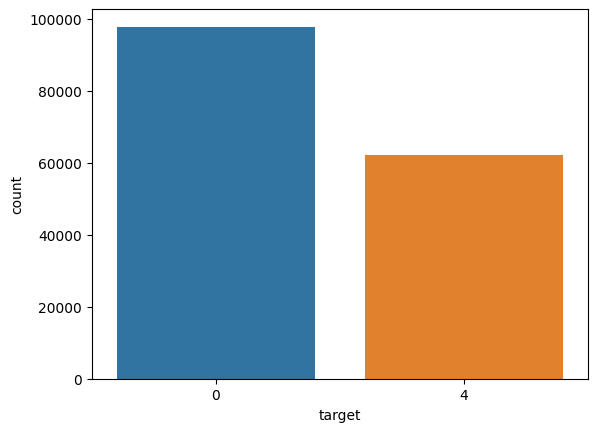

In [ ]:
sns.countplot(x=df['target']); # shows a count plot refering to the number of 0 and 4 in the column

In [ ]:
df = df.drop(['ids', 'date', 'flag','user'], axis = 1) # dropping unnecessary columns

In [ ]:
df.head()

,target,text
1073113,4,#myweakness My kids begging me for snuggles. O...
1010234,4,"@okse Honoured, truly. Thank you"
318969,0,"@toria_burford lol, no he's not. There's a bum..."
69694,0,I miss the weekend already dont want to work ...
700957,0,@mizkarlenemarie they closed saturday


In [ ]:
df['target']=df['target'].replace(4,1) 

In [ ]:
data = df['text']
labels = np.array(df['target'])

In [ ]:
data.iloc[1] # displaying a row of the data

'@okse Honoured, truly. Thank you '

In [ ]:
# this function is copied from another kernel. Don't know who is the original author of it.
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

#Removing the stopwords from text
def split_into_words(text):
    # split into words by white space
    words = text.split()
    return words

def to_lower_case(words):
    # convert to lower case
    words = [word.lower() for word in words]
    return words

def remove_punctuation(words):
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    stripped = [re_punc.sub('', w) for w in words]
    return stripped

def keep_alphabetic(words):
    # remove remaining tokens that are not alphabetic
    words = [word for word in words if word.isalpha()]
    return words

def remove_stopwords(words):
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

def to_sentence(words):
    # join words to a sentence
    return ' '.join(words)
def tweet(words):
    tweet_tokenizer = nltk.tokenize.TweetTokenizer(strip_handles=True,reduce_len=True)
    tweet = tweet_tokenizer.tokenize(words)
    return tweet
        

#Removing the noisy text
def denoise_text(text):
    words = split_into_words(text)
    words = to_lower_case(words)
    words = remove_punctuation(words)
    words = keep_alphabetic(words)
    words = remove_stopwords(words)
    return to_sentence(words)

In [ ]:
data = data.apply(denoise_text)

In [ ]:
print('Before: {}'. format(list(df['text'][:2])))
print('---')
print('After: {}'. format(list(data[:2])))

Before: ['#myweakness My kids begging me for snuggles. Oh and running chix with bouncy pony tails ;-) oh and my wife of course and her bouncy tail ', '@okse Honoured, truly. Thank you ']
---
After: ['myweakness kids begging snuggles oh running chix bouncy pony tails oh wife course bouncy tail', 'okse honoured truly thank']


In [ ]:
print(f"dataset contains {len(data)} examples\n")

print(f"Text of second example should look like this:  {data.iloc[1]}\n")
print(f"Text of fourth example should look like this:  {data.iloc[3]}")

print(f"\nLabels of last 5 examples should look like this:\n{labels[-5:]}")

dataset contains 160000 examples

Text of second example should look like this:  okse honoured truly thank

Text of fourth example should look like this:  miss weekend already dont want work wish homer simpson lol

Labels of last 5 examples should look like this:
[0 1 0 1 0]


In [ ]:
# Split in training validation and test sets
X_train, X_test, y_train, y_test = test = train_test_split(data, labels,test_size=0.20,
                                                           random_state=1,
                                                           stratify = labels)

In [ ]:
# lets take 10k words in num_words
tokenizer = Tokenizer(num_words=10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)+1
VOCAB_SIZE

114177

In [ ]:
maxlen = max([len(x) for x in X_train]) # return 175 which is too big for tweets data.
maxlen = 50

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(train_sequences,maxlen=maxlen,padding='post',truncating='post')
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences,maxlen=maxlen,padding='post',truncating='post')

In [ ]:
len(train_padded_sequences[0])

50

In [ ]:
embedding_dim = 32

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE+1, embedding_dim, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Dense(embedding_dim,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Dense(8,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid'),
    ])

model.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
#summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            3653696   
                                                                 
 bidirectional (Bidirectiona  (None, 32)               6272      
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1

In [ ]:
# Training the model we created above. 
history =    model.fit(train_padded_sequences,
                                               y_train,
                                               validation_data = (test_padded_sequences, y_test),
                                               epochs = 3)

Epoch 1/3
4000/4000 [==============================] - 329s 81ms/step - loss: 0.5263 - accuracy: 0.7353 - val_loss: 0.6260 - val_accuracy: 0.6240
Epoch 2/3
4000/4000 [==============================] - 299s 75ms/step - loss: 0.4614 - accuracy: 0.7845 - val_loss: 0.5144 - val_accuracy: 0.7588
Epoch 3/3
4000/4000 [==============================] - 297s 74ms/step - loss: 0.4323 - accuracy: 0.8000 - val_loss: 0.6344 - val_accuracy: 0.6833


In [ ]:
print(X_test.iloc[99],'label: ;',y_test[99])

got pretty nice label: ; 1


In [ ]:
tokenizer.sequences_to_texts(test_padded_sequences)[99]

'got pretty nice <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>'

In [ ]:
model.predict(test_padded_sequences)[99]

IndexError: ignored

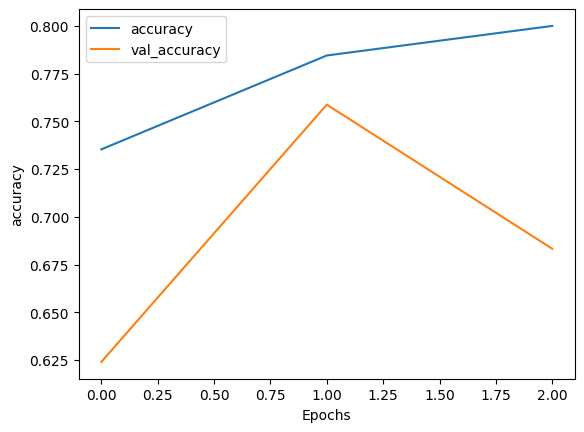

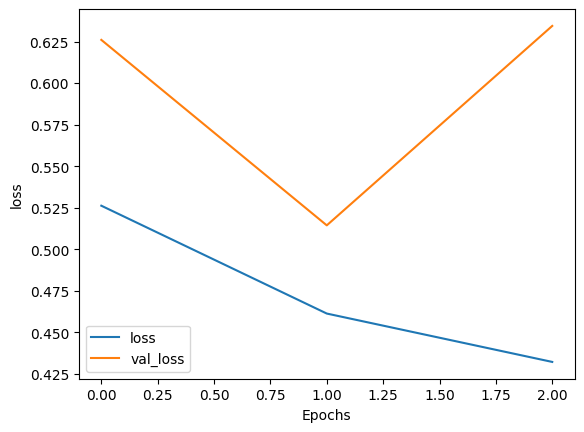

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")